# HW 14 Section 2 starting from the last question of Part 2 and moving to part 3

# Preparation

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
%matplotlib inline


powerplants = pd.read_csv('powerplants.csv')
points = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}



states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs = {'init': 'epsg:4326'}



bounds =   [[
              -138.515625,
              22.59372606392931
            ],
            [
              -56.25,
              22.59372606392931
            ],
            [
              -56.25,
              50.84757295365389
            ],
            [
              -138.515625,
              50.84757295365389
            ],
            [
              -138.515625,
              22.59372606392931
            ]]
            
continental_poly = Polygon(bounds)

states.to_crs({'init': 'epsg:4326'}).within(continental_poly).head(10)
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

pm25 = pd.read_csv('pm25_annual_fixed.csv')
points = pm25.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pm25 = gpd.GeoDataFrame(pm25, geometry=points)
pm25.crs = {'init': 'epsg:4326'}




In [24]:
plants_with_states = gpd.sjoin(powerplants, states, how='left', op='within')
states_for_counting = states.set_index('NAME')




In [25]:
states_for_counting['plant_count'] = plants_with_states['NAME'].value_counts()
states_for_counting['plant_count'].fillna(0, inplace=False)




NAME
Alabama                                           72.0
Alaska                                           138.0
Arizona                                          113.0
Arkansas                                          55.0
California                                      1222.0
Colorado                                         153.0
Connecticut                                       88.0
Delaware                                          25.0
District of Columbia                               2.0
Georgia                                          139.0
Hawaii                                            50.0
Idaho                                            136.0
Illinois                                         200.0
Indiana                                          133.0
Iowa                                             222.0
Kansas                                           129.0
Maryland                                          76.0
Minnesota                                        274.0
Missi

In [5]:
states_for_counting.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,plant_count
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113.0
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55.0
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222.0


# Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)



In [94]:
len(plants_with_states.PrimSource.value_counts())

11

In [16]:
renewable_investigation = plants_with_states[['PrimSource', 'plant_count', 'geometry', 'NAME' ]]

In [18]:
renewable_investigation.PrimSource.value_counts()

natural gas       1676
hydroelectric     1398
solar             1379
wind               932
petroleum          832
biomass            739
coal               380
other              112
geothermal          66
nuclear             62
pumped storage      34
Name: PrimSource, dtype: int64

In [19]:
states_renewable = renewable_investigation[renewable_investigation.PrimSource.isin(['solar', 'wind', 'hydroelectric'])]
states_nonrenewable = renewable_investigation[~renewable_investigation.PrimSource.isin(['solar', 'wind', 'hydroelectric'])]




In [39]:
states_renewable.groupby('NAME')['PrimSource'].count()

NAME
Alabama            23
Alaska             27
Arizona            68
Arkansas           20
California        750
Colorado           97
Connecticut        17
Delaware            8
Florida            19
Georgia            50
Hawaii             25
Idaho             107
Illinois           41
Indiana            57
Iowa               74
Kansas             28
Kentucky            9
Louisiana           1
Maine              65
Maryland           33
Massachusetts     180
Michigan           79
Minnesota         145
Missouri           15
Montana            35
Nebraska           27
Nevada             27
New Hampshire      42
New Jersey        129
New Mexico         59
New York          210
North Carolina    351
North Dakota       27
Ohio               28
Oklahoma           48
Oregon            104
Pennsylvania       60
Rhode Island        8
South Carolina     32
South Dakota       15
Tennessee          34
Texas             170
Utah               50
Vermont            63
Virginia           25
Washi

In [38]:
states_nonrenewable.groupby('NAME')['PrimSource'].count()

NAME
Alabama                  49
Alaska                  111
Arizona                  45
Arkansas                 35
California              472
Colorado                 56
Connecticut              71
Delaware                 17
District of Columbia      2
Florida                 125
Georgia                  89
Hawaii                   25
Idaho                    29
Illinois                159
Indiana                  76
Iowa                    148
Kansas                  101
Kentucky                 37
Louisiana                83
Maine                    32
Maryland                 43
Massachusetts            74
Michigan                140
Minnesota               129
Mississippi              40
Missouri                102
Montana                  15
Nebraska                 71
Nevada                   47
New Hampshire            24
New Jersey               78
New Mexico               33
New York                162
North Carolina          110
North Dakota             23
Ohio           

In [41]:
states_nonrenewable['Non_renewable'] = states_nonrenewable['PrimSource'] 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
states_nonrenewable.head()

,plant_count,geometry,NAME,Non_renewable
1,72.0,POINT (-88.0103 31.0069),Alabama,coal
3,72.0,POINT (-85.9708 34.0128),Alabama,natural gas
4,72.0,POINT (-87.19648599999999 33.644344),Alabama,coal
5,396.0,POINT (-106.375 31.7569),Texas,natural gas
6,72.0,POINT (-87.7811 32.6017),Alabama,natural gas


In [47]:
states_nonrenewable = states_nonrenewable.drop('PrimSource', 1)

In [49]:
states_renewable['renewable'] = states_renewable['PrimSource'] 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
states_renewable = states_renewable.drop('PrimSource', 1)

In [66]:
states_renewable.groupby('NAME')['renewable'].count()

NAME
Alabama            23
Alaska             27
Arizona            68
Arkansas           20
California        750
Colorado           97
Connecticut        17
Delaware            8
Florida            19
Georgia            50
Hawaii             25
Idaho             107
Illinois           41
Indiana            57
Iowa               74
Kansas             28
Kentucky            9
Louisiana           1
Maine              65
Maryland           33
Massachusetts     180
Michigan           79
Minnesota         145
Missouri           15
Montana            35
Nebraska           27
Nevada             27
New Hampshire      42
New Jersey        129
New Mexico         59
New York          210
North Carolina    351
North Dakota       27
Ohio               28
Oklahoma           48
Oregon            104
Pennsylvania       60
Rhode Island        8
South Carolina     32
South Dakota       15
Tennessee          34
Texas             170
Utah               50
Vermont            63
Virginia           25
Washi

In [67]:
states_nonrenewable.groupby('NAME')['Non_renewable'].count()

NAME
Alabama                  49
Alaska                  111
Arizona                  45
Arkansas                 35
California              472
Colorado                 56
Connecticut              71
Delaware                 17
District of Columbia      2
Florida                 125
Georgia                  89
Hawaii                   25
Idaho                    29
Illinois                159
Indiana                  76
Iowa                    148
Kansas                  101
Kentucky                 37
Louisiana                83
Maine                    32
Maryland                 43
Massachusetts            74
Michigan                140
Minnesota               129
Mississippi              40
Missouri                102
Montana                  15
Nebraska                 71
Nevada                   47
New Hampshire            24
New Jersey               78
New Mexico               33
New York                162
North Carolina          110
North Dakota             23
Ohio           

In [97]:
renewable_investigation = states_renewable.groupby('NAME')['renewable'].count() / (states_renewable.groupby('NAME')['renewable'].count() + states_nonrenewable.groupby('NAME')['Non_renewable'].count())








In [99]:
renewable_investigation * 100

NAME
Alabama                 31.944444
Alaska                  19.565217
Arizona                 60.176991
Arkansas                36.363636
California              61.374795
Colorado                63.398693
Connecticut             19.318182
Delaware                32.000000
District of Columbia          NaN
Florida                 13.194444
Georgia                 35.971223
Hawaii                  50.000000
Idaho                   78.676471
Illinois                20.500000
Indiana                 42.857143
Iowa                    33.333333
Kansas                  21.705426
Kentucky                19.565217
Louisiana                1.190476
Maine                   67.010309
Maryland                43.421053
Massachusetts           70.866142
Michigan                36.073059
Minnesota               52.919708
Mississippi                   NaN
Missouri                12.820513
Montana                 70.000000
Nebraska                27.551020
Nevada                  36.486486
New Hamps

# GROUP THREE: Buffers, or more interesting/complicated analysis

Do states with coal power plants have dirtier air?

Which power plants are within 75 miles of New York City?

Map all of the power plants in New York, New Jersey, Pennsylvania and Connecticut. Have a nice bottom layer of those 4 states.

What is the most popular power source by state?

Get the average (or highest/worst) PM2.5 within XXX miles of each power plant (you pick the distance). Is coal dirtier than other kinds of plants?

Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

Are places with below-average air quality closer to power plants?


* Do states with coal power plants have dirtier air?



In [93]:
states_for_counting['Coal_power'] = plants_in_states.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False)

In [88]:
states_for_counting['avg_air_qual'] = pm25.groupby('State Name')['Arithmetic Mean'].sum()

(-5084027.021374774, 5078419.621888997)

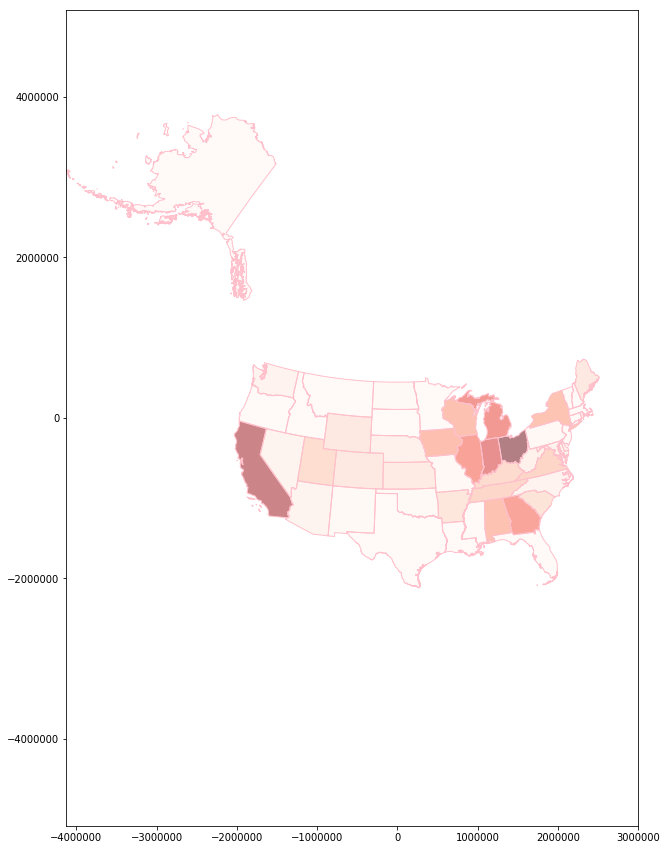

In [90]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'avg_air_qual', cmap='Reds', edgecolor='pink')
ax
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)






(-5084027.021374774, 5078419.621888997)

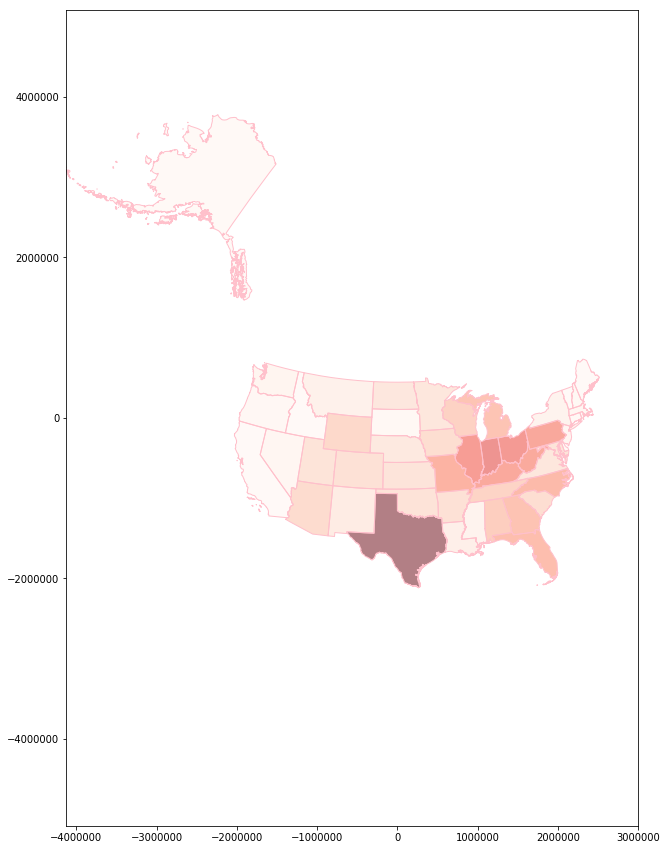

In [95]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(figsize=(15,15), column= 'Coal_power', cmap='Reds', edgecolor='pink')
ax
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)







* Which power plants are within 75 miles of New York City?



(-5084027.021374774, 5078419.621888997)

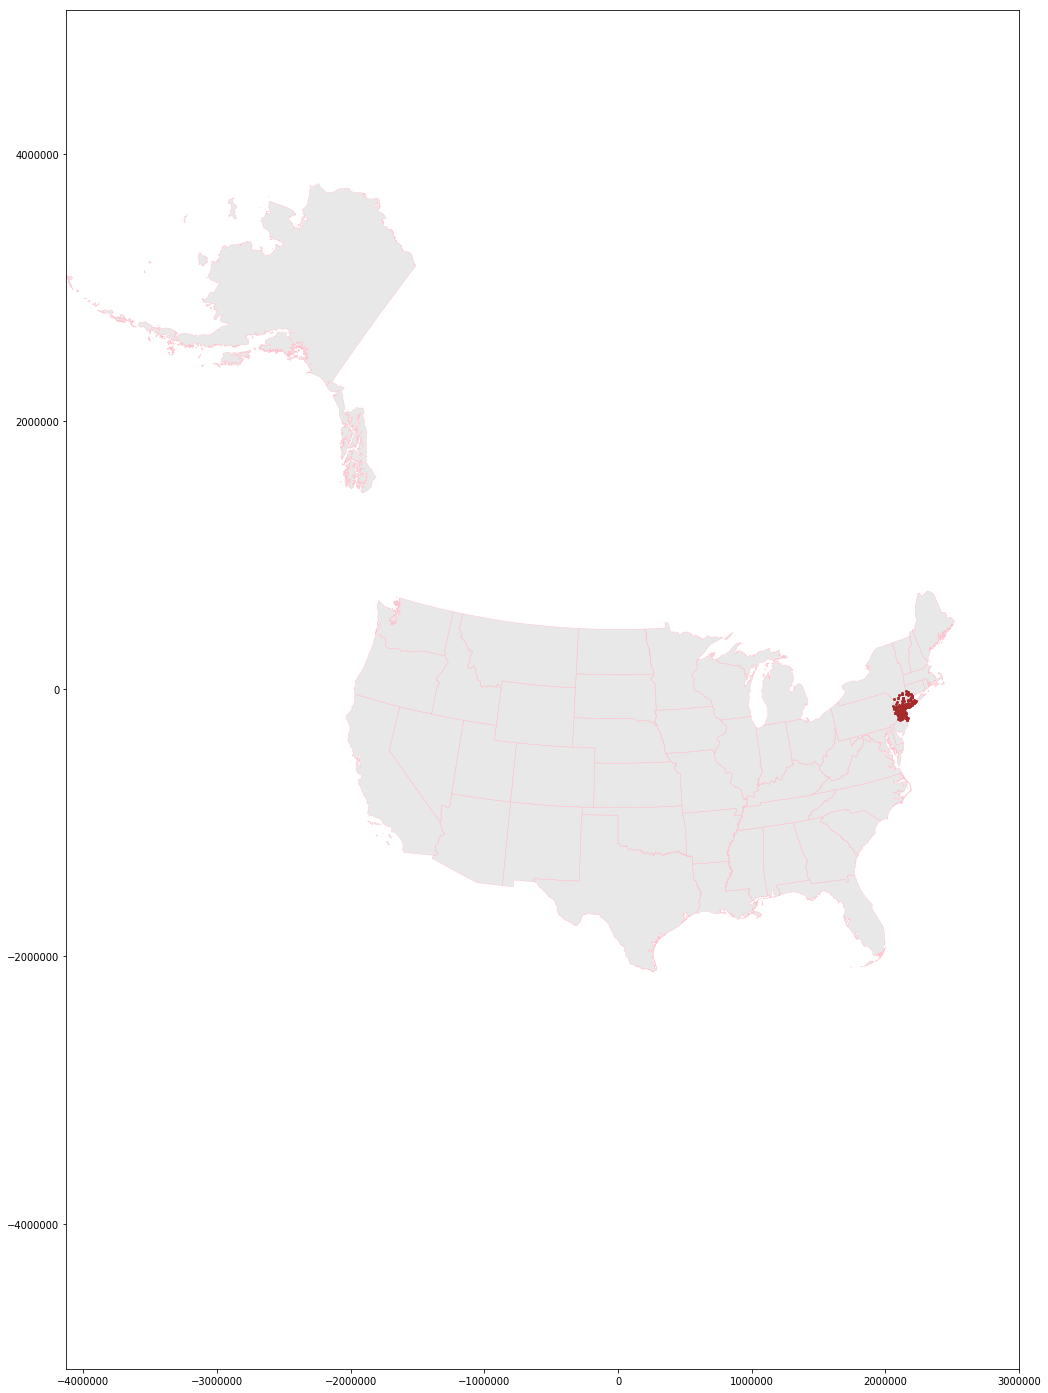

In [114]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(color='lightgrey', edgecolor='pink', linewidth=0.4, figsize=(25,25))
new_york_buffer = Point(-74.0059413, 40.7127837).buffer(1.09)
gpd.plotting.plot_polygon(ax=ax, poly=new_york_buffer)
powerplants.to_crs({'init':'epsg:2163'})[powerplants.within(new_york_buffer)].plot(ax=ax, color='brown')
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)



* Map all of the power plants in New York, New Jersey, Pennsylvania and Connecticut. Have a nice bottom layer of those 4 states.



In [117]:
states_selected = states[states.NAME.isin(['New York', 'New Jersey', 'Pennsylvania', 'Connecticut'])]
states_selected_not = states[~states.NAME.isin(['New York', 'New Jersey', 'Pennsylvania', 'Connecticut'])]

In [177]:
len(powerplants)

7610

In [169]:
states_selected.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
21,0400000US34,19050755048,3541927612,34,00,New Jersey,34,01779795,NJ,"POLYGON ((-75.559102 39.629056, -75.5594459999..."
25,0400000US42,115882226263,3396805575,42,00,Pennsylvania,42,01779798,PA,"POLYGON ((-80.519891 40.906661, -80.519091 40...."
43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,"(POLYGON ((-72.0368298202051 41.2498425393847,..."


In [201]:
states_selected_power = gpd.sjoin(powerplants, states_selected, how='inner', op='within')

In [202]:
len(states_selected_power)

874

In [203]:
states_selected_power.geometry.head()

49                 POINT (-74.2063 41.949)
363           POINT (-74.131877 41.828814)
387     POINT (-73.68049999999999 42.9126)
469     POINT (-75.10899999999999 43.3121)
1169          POINT (-73.974981 41.571247)
Name: geometry, dtype: object

(-5084027.021374774, 5078419.621888997)

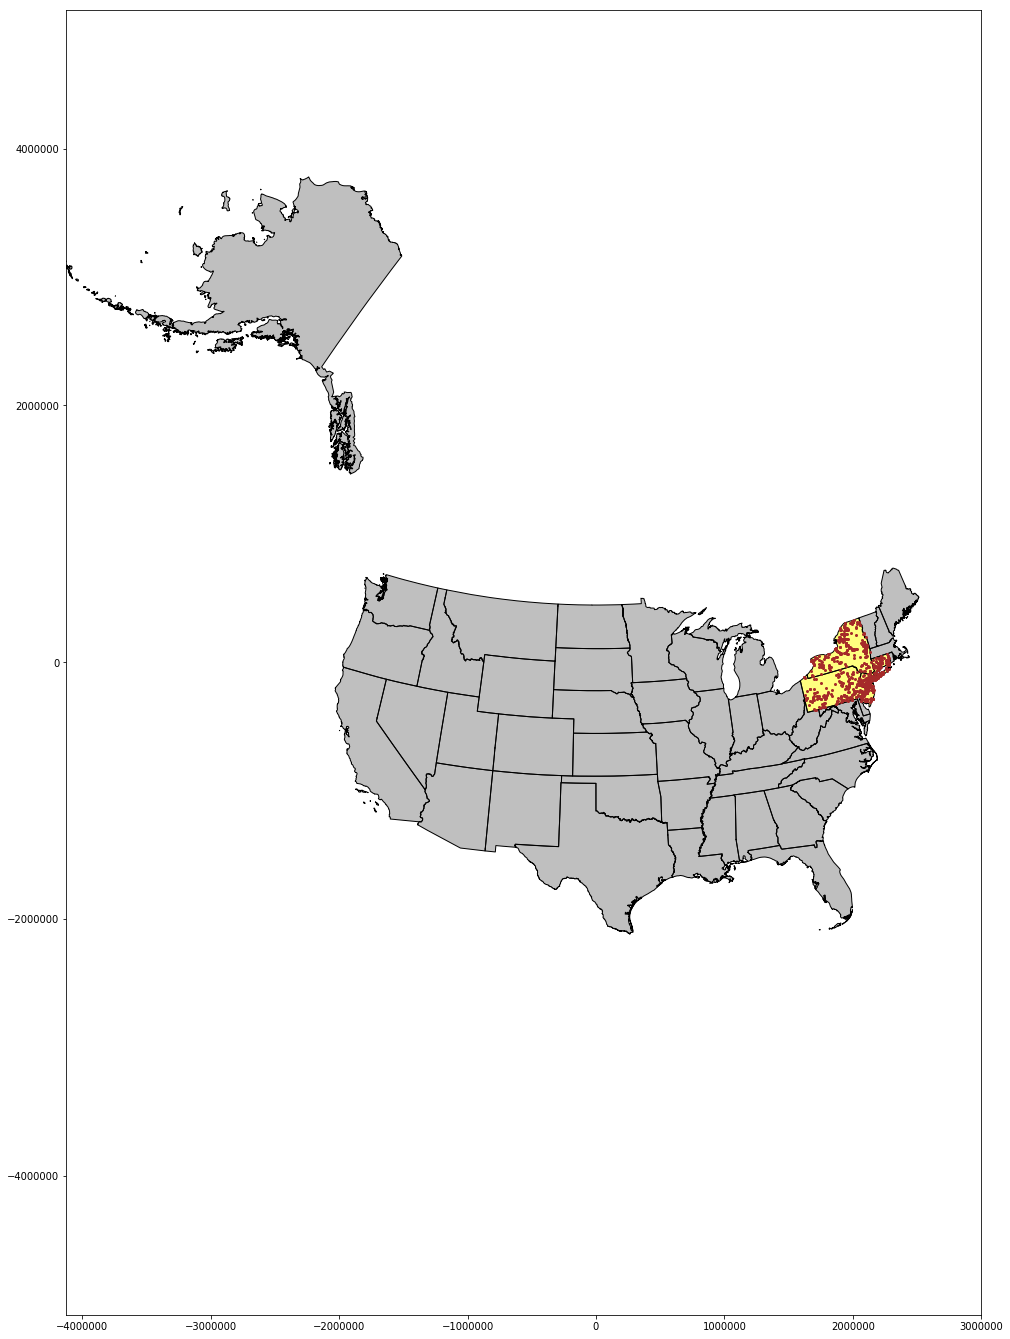

In [204]:
ax = states_selected.to_crs({'init':'epsg:2163'}).plot(figsize=(24,24), color='yellow')
states_selected_not.to_crs({'init':'epsg:2163'}).plot(color='grey', ax=ax)
states_selected_power.to_crs({'init':'epsg:2163'}).plot(ax=ax, color='brown')
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)



* What is the most popular power source by state?



In [223]:
plants_in_states.groupby('NAME')['PrimSource'].max(ascending=False)

NAME
Alabama                   petroleum
Alaska                         wind
Arizona                        wind
Arkansas                      solar
California                     wind
Colorado                       wind
Connecticut                   solar
Delaware                       wind
District of Columbia    natural gas
Florida                       solar
Georgia                       solar
Hawaii                         wind
Idaho                          wind
Illinois                       wind
Indiana                        wind
Iowa                           wind
Kansas                         wind
Kentucky                  petroleum
Louisiana                 petroleum
Maine                          wind
Maryland                       wind
Massachusetts                  wind
Michigan                       wind
Minnesota                      wind
Mississippi               petroleum
Missouri                       wind
Montana                        wind
Nebraska               

* Get the average (or highest/worst) PM2.5 within XXX miles of each power plant (you pick the distance). Is coal dirtier than other kinds of plants?



In [228]:
plants_in_states.dtypes

index            int64
AFFGEOID        object
ALAND            int64
AWATER           int64
GEOID           object
LSAD            object
NAME            object
STATEFP         object
STATENS         object
STUSPS          object
geometry        object
index_right      int64
Plant_Code       int64
Plant_Name      object
Utility_Na      object
Utility_ID       int64
sector_nam      object
City            object
County          object
Zip              int64
Street_Add      object
PrimSource      object
Total_MW       float64
Coal_MW        float64
NG_MW          float64
Crude_MW       float64
Bio_MW         float64
Hydro_MW       float64
HydroPS_MW     float64
Nuclear_MW     float64
Solar_MW       float64
Wind_MW        float64
Geo_MW         float64
Other_MW       float64
source_des      object
tech_desc       object
Source          object
Period           int64
Latitude       float64
Longitude      float64
Coal_power     float64
dtype: object

In [227]:
pm25.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

In [ ]:
ax = states_for_counting.to_crs({'init':'epsg:2163'}).plot(color='lightgrey', edgecolor='pink', linewidth=0.4, figsize=(25,25))
new_york_buffer = Point(-74.0059413, 40.7127837).buffer(1.09)
gpd.plotting.plot_polygon(ax=ax, poly=new_york_buffer)
powerplants.to_crs({'init':'epsg:2163'})[powerplants.within(new_york_buffer)].plot(ax=ax, color='brown')
ax.set_xlim(-4124457, 3000000)
ax.set_ylim(-5084027.0213747746, 5078419.621888997)




In [229]:
pm25_merc = pm25.to_crs({'proj':'merc'})

In [230]:
powerplants.crs

{'init': 'epsg:4326'}

In [231]:
powerplants_merc = powerplants.to_crs({'proj':'merc'})

In [232]:
powerplants_merc['geometry'] = powerplants_merc.buffer(40000)

In [233]:
inner_stations = pm25_merc[pm25_merc.within(powerplants_merc.unary_unionry_union)]

In [235]:
states.crs

{'init': 'epsg:4326'}

In [251]:
states_merc = states.to_crs({'proj':'merc'})

In [252]:
states_merc.crs

{'proj': 'merc'}

In [259]:
plants_in_states = plants_in_states.to_crs({'proj':'merc'})

(-21940545.97915272,
 22010628.389096022,
 -2282958.9967081598,
 12158780.26532717)

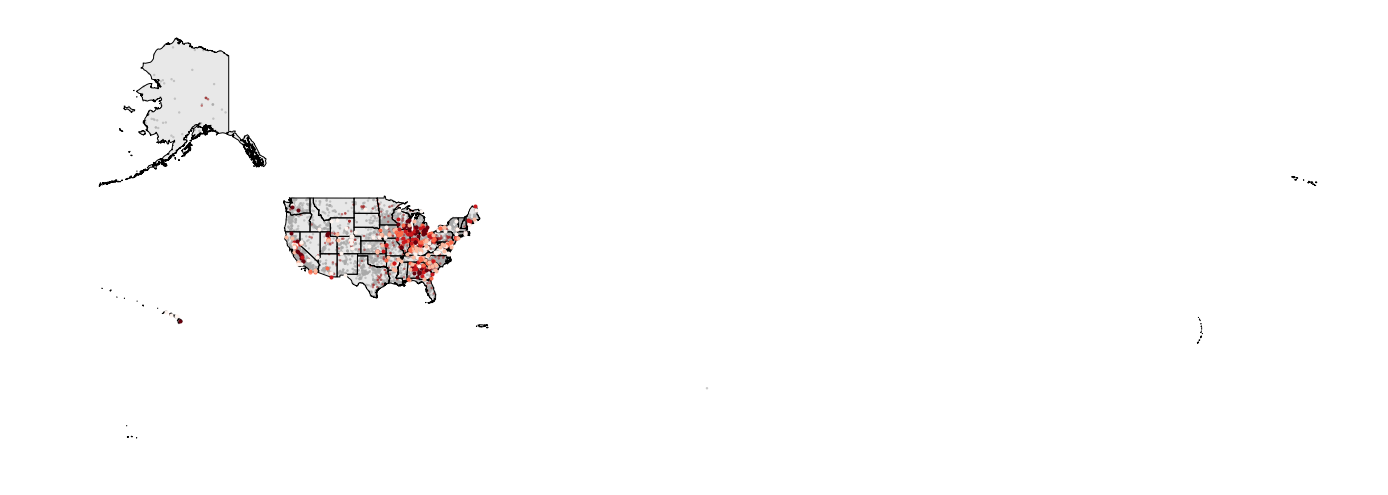

In [258]:
ax = states_merc.plot(figsize=(24,24), color = 'lightgrey')
powerplants_merc[powerplants_merc['PrimSource'] != 'coal'].plot(color='darkgrey', linewidth=0, alpha=0.6, ax=ax)
powerplants_merc[powerplants_merc['PrimSource'] == 'coal'].plot(color='brown', linewidth=0, alpha=0.6, ax=ax)
inner_stations.plot(column='Arithmetic Mean', cmap='Reds', scheme='Quantiles', markersize=3, ax=ax)
ax.axis('off')

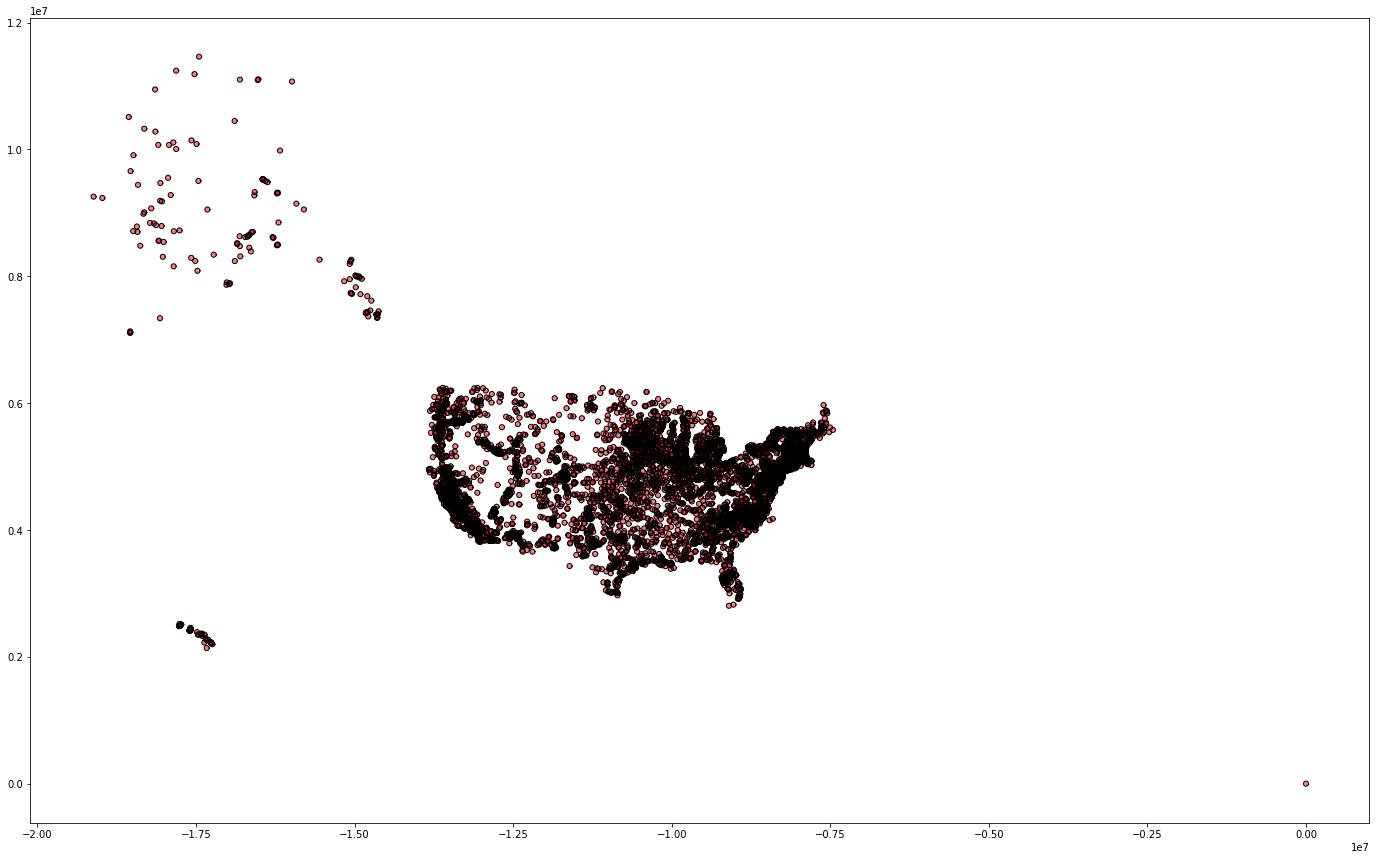

In [243]:
powerplants_merc.plot(figsize=(24,24), color='red')

In [255]:
inner_stations.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed